##Predicting Customer Spending and Analyzing Trends in a Clothing Store

###Goal:
The project aims to predict annual customer spending using customer attributes and explore how these attributes have evolved over time to refine marketing and sales strategies.

###Importing Necessary Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder #Z-score variables
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score #model evaluation


###Loading and Inspecting the Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/boutique.csv")
print(df.head())

   year gender   age  height_cm  waist_size_cm  inseam_cm  test_group  \
0  2020  woman  34.0        168             98       75.0           0   
1  2020    man  28.0        168             88       76.0           0   
2  2021  woman  18.0        170             95       75.0           0   
3  2021  woman  43.0        167             97       75.0           0   
4  2021  other  29.0        173             89       74.0           0   

   salary_self_report_in_k  months_active  num_purchases  amount_spent_annual  
0                    69.83             21             89               729.73  
1                    61.39              7             32               621.73  
2                    80.55              2             25               820.82  
3                    82.98              4             89               880.33  
4                    62.00              5             95               690.35  


###Data Cleaning and Preprocessing

In [ ]:
# Drop missing values and reset indices
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
# Define the preprocessing steps for the pipeline
categorical_cols = ['gender', 'test_group']
numeric_cols = ['age', 'height_cm', 'waist_size_cm', 'inseam_cm', 'salary_self_report_in_k', 'months_active', 'num_purchases']


###Separating Features and Target Variable, and Splitting the Data

In [ ]:
# Separate features and target variable
X = df.drop(columns=['amount_spent_annual'])
y = df['amount_spent_annual']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train[0:10])


       year gender   age  height_cm  waist_size_cm  inseam_cm  test_group  \
24438  2022  woman  25.0        159             75       76.0           1   
2498   2020  woman  28.0        172             93       73.0           0   
21130  2021  woman  39.0        176            100       75.0           1   
18041  2019  woman  43.0        163             94       77.0           1   
4954   2020  woman  26.0        167             93       74.0           0   
14425  2021  woman  45.0        166             95       72.0           1   
6223   2021  woman  23.0        174             98       75.0           0   
12912  2019  woman  38.0        160            114       76.0           1   
20391  2022  woman  26.0        168             89       74.0           1   
1199   2019  woman  21.0        175             93       73.0           0   

       salary_self_report_in_k  months_active  num_purchases  
24438                    74.93              3             56  
2498                     4

###Creating Transformers for Preprocessing

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

###Bundling Preprocessing for Numerical and Categorical Data

In [ ]:
# Create a column transformer to apply the appropriate preprocessing to each feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

###Building and Evaluating Regression Models

In [ ]:
# Linear Regression Model
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

# Polynomial Regression Model
poly_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                             ('regressor', LinearRegression())])

# Train both models
linear_model.fit(X_train, y_train)
poly_model.fit(X_train, y_train)

# Predictions on training and testing sets
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

# Print Polynomial Regression coefficients
poly_regression_coef = poly_model.named_steps['regressor'].coef_
print("Polynomial Regression Coefficients:")
print(poly_regression_coef)


Polynomial Regression Coefficients:
[ 1.45144710e+00 -4.66672188e+00  3.17691440e-01  4.63144270e-01
  8.82336113e+01  3.44269820e-01  1.97254116e+01  1.12755701e+13
  2.03418105e+12 -3.57876201e+13 -3.41587412e+13  3.49750115e+01
 -9.29269789e-01  1.19805833e-01  2.83701704e-01  4.02511146e-01
 -7.83248951e-01  2.31006977e-01  7.08859737e-01  1.41220515e+00
 -1.19743437e+00  3.79307136e-01 -3.55847423e+01  4.18488525e-01
 -6.16232787e-01  3.50931721e-03 -2.55957500e-01 -2.18342333e-01
  7.69255141e+00  6.70988502e+00  9.09873579e+00 -4.80099657e-01
  4.08724767e-01 -8.82812500e-01  1.34765625e-01  1.95312500e-02
 -1.40869141e+00 -3.27099609e+00  4.66113281e+00 -5.53710938e-01
  1.72509956e+00 -3.48564453e+01  1.13281250e-01 -8.56445312e-01
 -3.86352539e-01 -3.08593750e+00  1.36474609e-01 -2.06054688e-01
  3.41796875e-01  7.67089844e-01 -2.97363281e-01 -1.17480469e+00
  9.84863281e-01 -2.88989258e+00 -8.47656250e-01  2.24609375e-01
 -6.90927734e+01 -5.01678467e-01 -7.95166016e-01  1.86

###Evaluating Regression Model Performance

In [ ]:
# Calculate evaluation metrics for Linear Regression
mse_linear_train = mean_squared_error(y_train, y_train_pred_linear)
mae_linear_train = mean_absolute_error(y_train, y_train_pred_linear)
mape_linear_train = mean_absolute_percentage_error(y_train, y_train_pred_linear)
r2_linear_train = r2_score(y_train, y_train_pred_linear)

mse_linear_test = mean_squared_error(y_test, y_test_pred_linear)
mae_linear_test = mean_absolute_error(y_test, y_test_pred_linear)
mape_linear_test = mean_absolute_percentage_error(y_test, y_test_pred_linear)
r2_linear_test = r2_score(y_test, y_test_pred_linear)

# Calculate evaluation metrics for Polynomial Regression
mse_poly_train = mean_squared_error(y_train, y_train_pred_poly)
mae_poly_train = mean_absolute_error(y_train, y_train_pred_poly)
mape_poly_train = mean_absolute_percentage_error(y_train, y_train_pred_poly)
r2_poly_train = r2_score(y_train, y_train_pred_poly)

mse_poly_test = mean_squared_error(y_test, y_test_pred_poly)
mae_poly_test = mean_absolute_error(y_test, y_test_pred_poly)
mape_poly_test = mean_absolute_percentage_error(y_test, y_test_pred_poly)
r2_poly_test = r2_score(y_test, y_test_pred_poly)

# Print the results
print("Linear Regression Metrics (Training):")
print("MSE:", mse_linear_train)
print("MAE:", mae_linear_train)
print("MAPE:", mape_linear_train)
print("R2:", r2_linear_train)

print("Polynomial Regression Model Results (Test Set):")
print("MSE:", mse_poly_train)
print("MAE:", mae_poly_train)
print("MAPE:", mape_poly_train)
print("R2:", r2_poly_test)

Linear Regression Metrics (Training):
MSE: 15385.643379170782
MAE: 97.88635307785198
MAPE: 0.13936046422522955
R2: 0.43091036477749123
Polynomial Regression Model Results (Test Set):
MSE: 5511.624727895272
MAE: 59.6442912209859
MAPE: 0.07996816243921545
R2: 0.7989494677344104


###Analyzing the Impact of Test Group on Annual Spending by Gender


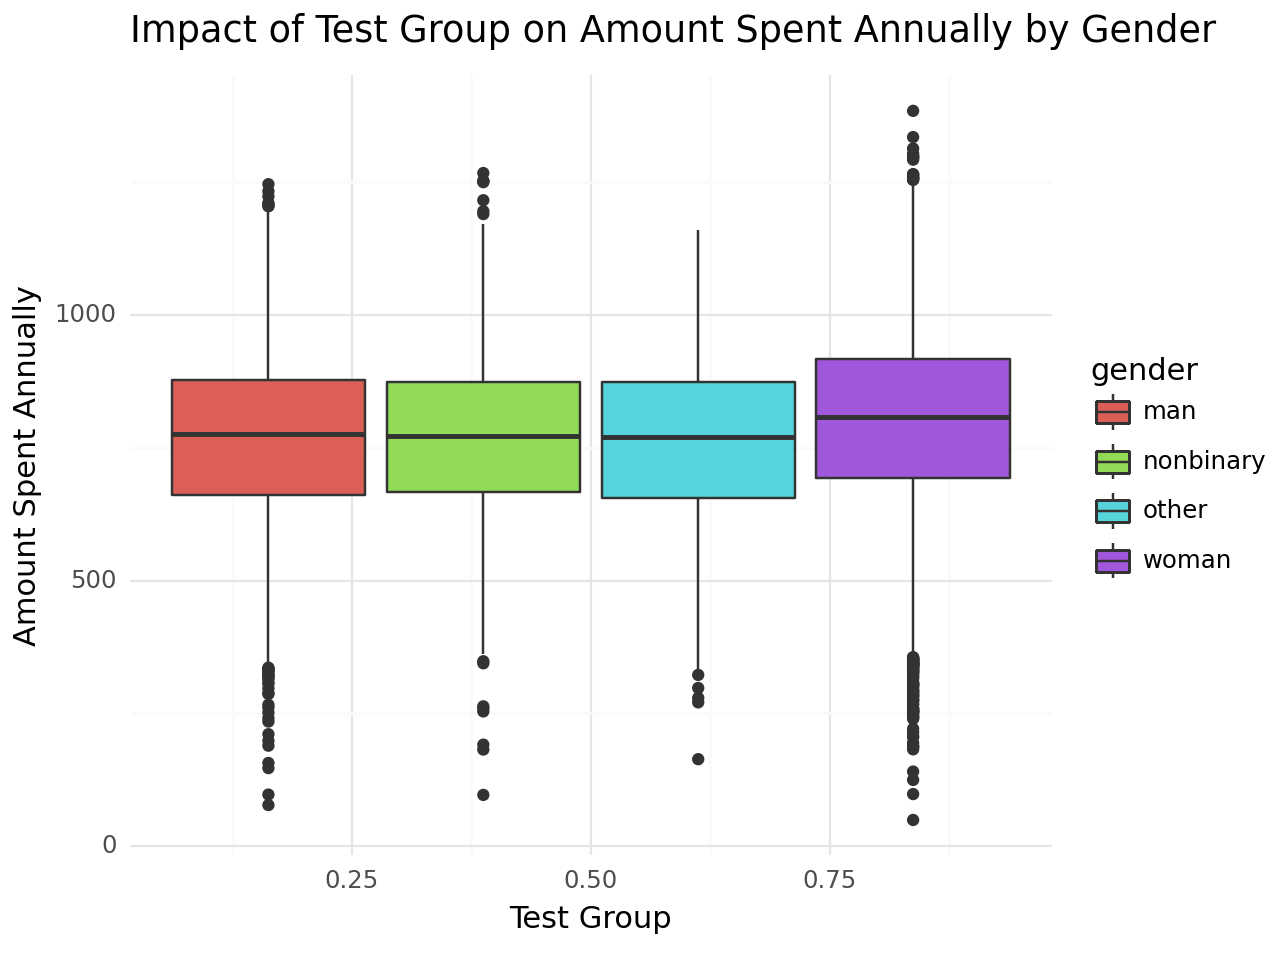

In [ ]:
# Create a ggplot plot
plot = ggplot(df, aes(x='test_group', y='amount_spent_annual', fill='gender')) + \
    geom_boxplot() + \
    labs(title="Impact of Test Group on Amount Spent Annually by Gender",
         x="Test Group",
         y="Amount Spent Annually") + \
    theme_minimal()

# Show the plot
print(plot)

###Does being in the experimental test_group actually increase the amount a customer spends at the store? Is this relationship different for the different genders?**

The coefficient for 'test_group' is positive and statistically significant. It suggests that being in the test group is associated with higher spending on average. ‘Test_group: gender_female' suggests that being in the test group has a stronger impact on spending for females than males.

###Analyzing Changes in Customer Base Over Time


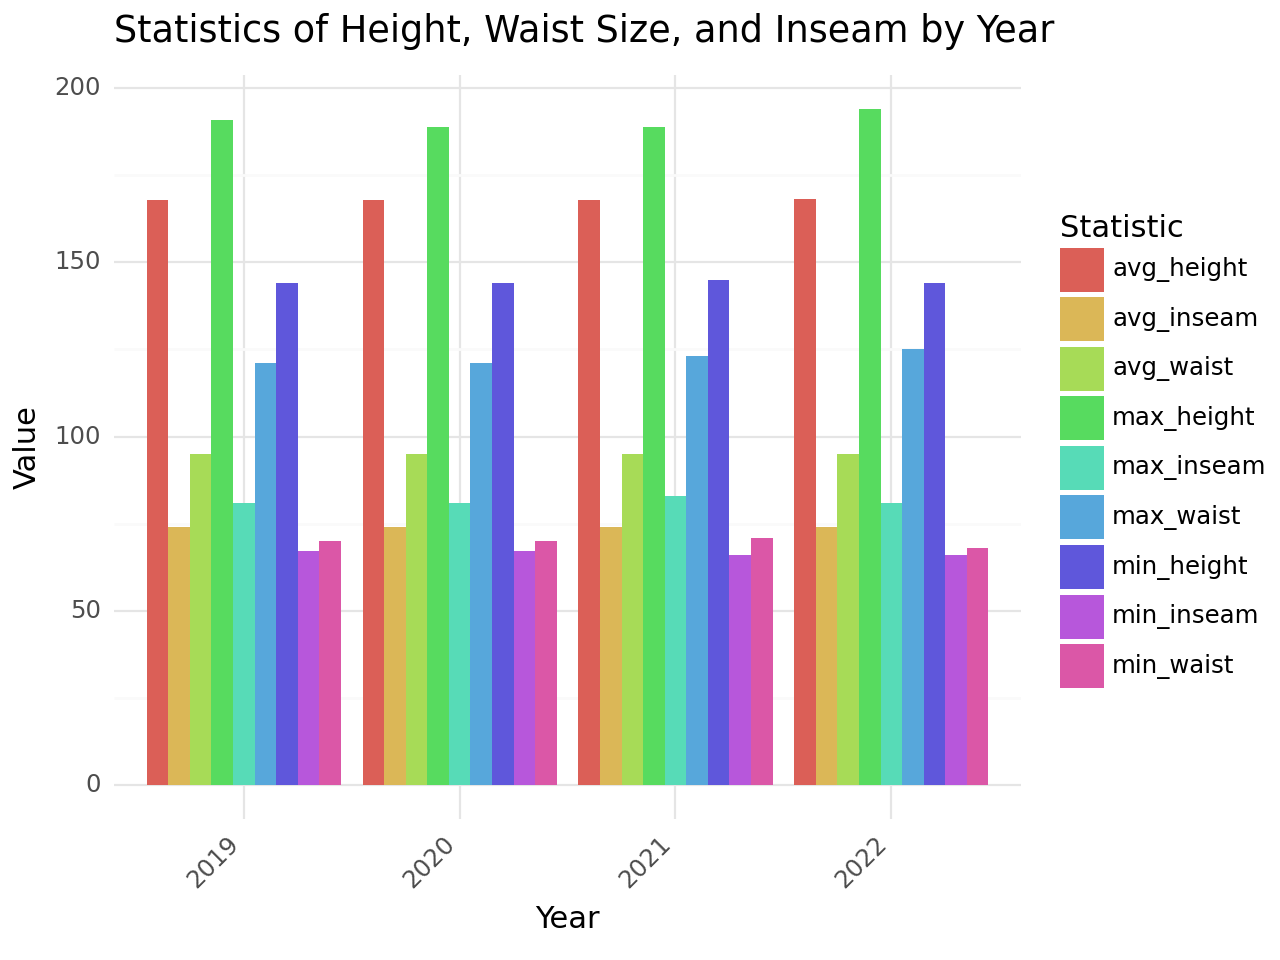


   year  min_height  max_height  avg_height  min_waist  max_waist  avg_waist  \
0  2019         144         191  167.958479         70        121  94.959746   
1  2020         144         189  168.030669         70        121  95.096248   
2  2021         145         189  168.027714         71        123  94.917350   
3  2022         144         194  168.095842         68        125  95.012843   

   min_inseam  max_inseam  avg_inseam  
0        67.0        81.0   73.987322  
1        67.0        81.0   74.004241  
2        66.0        83.0   73.994752  
3        66.0        81.0   74.038690  
[2020 2021 2019 2022]


In [ ]:
# Group the data by 'year' and calculate the desired statistics
statistics_by_year = df.groupby('year').agg(
    min_height=pd.NamedAgg(column='height_cm', aggfunc='min'),
    max_height=pd.NamedAgg(column='height_cm', aggfunc='max'),
    avg_height=pd.NamedAgg(column='height_cm', aggfunc='mean'),
    min_waist=pd.NamedAgg(column='waist_size_cm', aggfunc='min'),
    max_waist=pd.NamedAgg(column='waist_size_cm', aggfunc='max'),
    avg_waist=pd.NamedAgg(column='waist_size_cm', aggfunc='mean'),
    min_inseam=pd.NamedAgg(column='inseam_cm', aggfunc='min'),
    max_inseam=pd.NamedAgg(column='inseam_cm', aggfunc='max'),
    avg_inseam=pd.NamedAgg(column='inseam_cm', aggfunc='mean')
).reset_index()

# Melt the DataFrame for ggplot
statistics_by_year_melted = pd.melt(statistics_by_year, id_vars=['year'],
                                    value_vars=['min_height', 'max_height', 'avg_height',
                                                'min_waist', 'max_waist', 'avg_waist',
                                                'min_inseam', 'max_inseam', 'avg_inseam'],
                                    var_name='Statistic', value_name='Value')

# Create the ggplot plot
plot = ggplot(statistics_by_year_melted, aes(x='factor(year)', y='Value', fill='Statistic')) + \
    geom_bar(stat='identity', position='dodge') + \
    labs(title="Statistics of Height, Waist Size, and Inseam by Year",
         x="Year",
         y="Value",
         fill="Statistic") + \
    theme_minimal() + \
    theme(axis_text_x=element_text(angle=45, hjust=1))  # Rotate x-axis labels for better readability

# Show the plot
print(plot)
# Debugging code
print(statistics_by_year)  # Print the grouped DataFrame to inspect the data
print(df['year'].unique())  # Print unique values in the 'year' column to verify data



###The store is interested in whether their customer base has changed over time. Present the minimum, maximum, and average height, waist size, and inseam for each year.

From 2019 to 2022, customer physical characteristics, including height, waist size, and inseam, have displayed stability. Average height and waist size remained consistent, with minor fluctuations. Inseam lengths showed minimal variation, and the range of measurements remained steady. Overall, these findings indicate that the customer base's physical attributes have remained relatively unchanged during this time.

###Methods:
he apparel business sought to learn more about the basic or complex links that affected client spending by using both linear and polynomial regression models. Making data-driven decisions based on precise spending estimates allowed the retailer to better target marketing strategies, improve inventory, and ultimately increase customer happiness and loyalty.


###Results:
On the test set, the Polynomial Regression model performs better than the Linear Regression model in every statistic. It is more predictively accurate since it has substantially lower MSE, MAE, and MAPE values. The Polynomial Regression model's R-squared (R2) value is also noticeably higher, indicating a superior fit to the data. The Polynomial Regression model is not overfitting. The lower test set metrics than training set metrics indicate that the model generalizes well to new data. The Polynomial Regression model's usage of PolynomialFeatures raises the possibility of non-linear connections between attributes and spending. The test set's increased performance measures show that polynomial features and interactions do, in fact, offer a better match to the data than a straightforward linear model. There is confidence in the model's capacity to accurately estimate consumer spending due to the better performance of the Polynomial Regression model on the test set and the absence of overfitting. The store may think about utilizing this approach to forecast customer spending.

###Discussion/Reflection:
These analyses have taught me that there is a reasonably constant relationship over time between client characteristics (such as height, waist size, and inseam). The results of the linear and polynomial regression models shed light on how these characteristics work together to predict annual consumption.
Exploring more sophisticated modeling methods or feature engineering to perhaps increase predicted accuracy is one recommendation for further investigation. Additionally, acquiring more customer information about preferences, past purchases, or seasonal trends may improve the performance of the models and offer the clothes retailer more useful information.
In general, it's crucial to keep the research updated and refined when new data becomes available and to consider additional aspects that could affect consumer buying habits.